In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
                
from sklearn.preprocessing import LabelEncoder
from src.wrapped import Wrapped
from src.analyses import * 

# Importando dados para treinamento

In [3]:
wp = Wrapped(
    '../data/row/',
    '../data/processed/',
    '../data/files/'
)

# dataframe
df = wp.load_data('df_instrumentos_features_selecionadas')
df = df.query("instrumento != 'voice' & instrumento != 'synthesizer'")

# dataframes por instrumentos
inst_corda    = ["cello", "guitar", "violin", "bass", "banjo", "mandolin", "ukulele"]
inst_percusao = ["mallet_percussion", "drums", "cymbals"]
inst_sopro    = ["clarinet", "trombone", "flute", "trumpet", "saxophone"]
inst_aerofone = ["accordion", "organ", "piano"] 

df_inst_aerofone = df[df['instrumento'].isin(inst_aerofone)]
df_inst_sopro    = df[df['instrumento'].isin(inst_sopro)]
df_inst_corda    = df[df['instrumento'].isin(inst_corda)]
df_inst_percusao = df[df['instrumento'].isin(inst_percusao)]

# Pre-processamento

- Label Encoder

In [4]:
le = LabelEncoder()

df_inst_aerofone['labels'] = le.fit_transform(df_inst_aerofone.instrumento)
df_inst_sopro['labels']    = le.fit_transform(df_inst_sopro.instrumento)
df_inst_corda['labels']    = le.fit_transform(df_inst_corda.instrumento)
df_inst_percusao['labels'] = le.fit_transform(df_inst_percusao.instrumento)

# Analise de Anomalias

- Detecção de outilers

In [5]:
knn_pred_df       = detected_outilers_knn(df)
knn_pred_aerofone = detected_outilers_knn(df_inst_aerofone)
knn_pred_sopro    = detected_outilers_knn(df_inst_sopro)
knn_pred_percusao = detected_outilers_knn(df_inst_percusao)
knn_pred_corda    = detected_outilers_knn(df_inst_corda)

preds_inst = {
    'Base Geral': knn_pred_df,
    'Aerofone': knn_pred_aerofone,
    'Sopro': knn_pred_sopro,
    'Percusao': knn_pred_percusao,
    'Corda': knn_pred_corda
}

- Numeros de outilers e inlers

In [6]:
for inst in preds_inst.keys():
    print(f'{inst} -> {np.unique(preds_inst[inst], return_counts=True)}')

Base Geral -> (array([0, 1]), array([6884,  765]))
Aerofone -> (array([0, 1]), array([1576,  174]))
Sopro -> (array([0, 1]), array([1448,  161]))
Percusao -> (array([0, 1]), array([1402,  156]))
Corda -> (array([0, 1]), array([2458,  274]))


In [118]:
# inlers
1576 + 1448 + 1402 + 2458

6884

In [119]:
# outilers
174 + 161 + 156 + 274 

765

- Grafíco de Anomalias TSNE

In [ ]:
graphic_anomalies(df, knn_pred_df,'Instrumentos Base global')

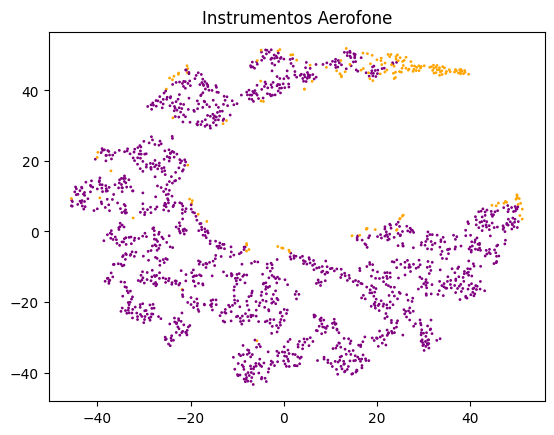

In [ ]:
graphic_anomalies(df_inst_aerofone, knn_pred_aerofone,'Instrumentos Aerofone')

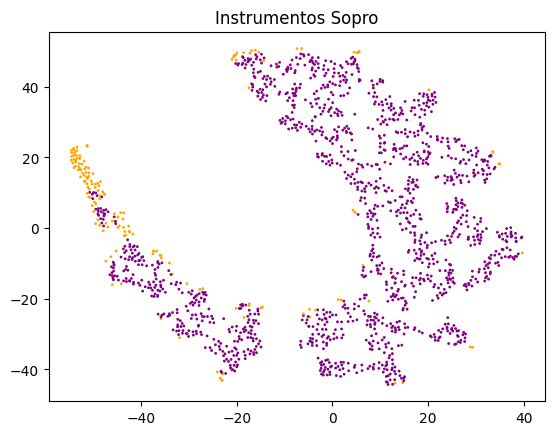

In [ ]:
graphic_anomalies(df_inst_sopro, knn_pred_sopro,'Instrumentos Sopro')

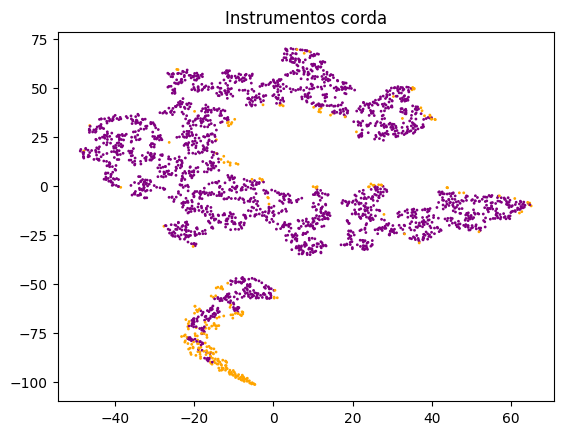

In [ ]:
graphic_anomalies(df_inst_corda, knn_pred_corda,'Instrumentos corda')

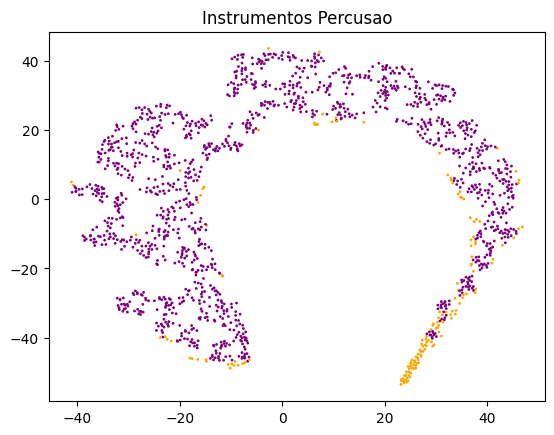

In [ ]:
graphic_anomalies(df_inst_percusao, knn_pred_percusao,'Instrumentos Percusao')

- Outilers da base 

In [7]:
outilers_aerofone = show_outilers(df_inst_aerofone, knn_pred_aerofone)
outilers_sopro = show_outilers(df_inst_sopro, knn_pred_sopro)
outilers_percusao = show_outilers(df_inst_percusao, knn_pred_percusao)
outilers_corda = show_outilers(df_inst_corda, knn_pred_corda)
outilers_base_geral = show_outilers(df, knn_pred_df)

In [ ]:
outilers_aerofone

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento,file_name,labels
3,0.157274,-0.066099,0.209729,0.338755,0.660264,0.256625,0.275209,0.180417,0.399448,-66.319801,...,2903.979876,1.218963,6751.133809,-42.723160,-44.649315,0.144010,31836,accordion,000212_211200.ogg,0
11,0.067479,-0.072520,0.319265,0.259853,0.236549,0.416537,0.552991,0.282335,0.311797,-94.087822,...,2669.619821,1.465200,6189.322048,-46.716263,-67.817337,0.096043,21237,accordion,004073_30720.ogg,0
28,0.177880,0.099179,0.446227,0.186154,0.310970,0.289374,0.480033,0.271526,0.262448,-113.129501,...,3178.625677,1.504104,5658.636007,-64.840324,-79.991013,0.225914,49936,accordion,011547_157440.ogg,0
35,-0.231209,-0.164767,0.777508,0.578240,0.235910,0.271922,0.123425,0.241857,0.367082,-22.823570,...,2150.842674,0.733548,4609.279553,-52.478855,-73.244209,0.110248,24359,accordion,013463_195840.ogg,0
46,0.001389,0.058207,0.307783,0.359920,0.321503,0.340189,0.230577,0.230887,0.267941,-335.472443,...,3317.306522,1.480623,6072.413242,-37.332355,-79.453758,0.249911,55267,accordion,019554_199680.ogg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,0.320744,0.333888,0.157782,0.363536,0.682014,0.422248,0.271323,0.336627,0.666637,-345.862030,...,357.755105,0.542614,697.306070,-28.129459,-64.974831,0.018301,4058,piano,109200_3840.ogg,2
5763,0.015400,0.123637,0.372522,0.159783,0.299456,0.384501,0.292673,0.341428,0.091393,-226.478699,...,942.045483,1.311127,1374.577767,-37.704166,-79.981483,0.079346,17538,piano,109282_7680.ogg,2
5771,-0.272394,-0.220975,0.386687,0.572144,0.377248,0.291276,0.279419,0.360151,0.437108,-318.811493,...,499.685219,0.679895,1074.961481,-52.980217,-61.614857,0.017695,3918,piano,112068_1566720.ogg,2
5819,0.027706,0.089406,0.434948,0.125371,0.231317,0.110108,0.047079,0.052817,0.032457,-330.949127,...,1205.187669,1.246012,1720.058277,-59.069580,-72.654686,0.129964,28728,piano,119297_195840.ogg,2


- Numero de Outilers por base

In [ ]:
table_outilers_inst(outilers_base_geral)

,nome,total_inst
0,flute,130
1,mallet_percussion,128
2,cymbals,87
3,violin,59
4,drums,55
5,organ,49
6,bass,46
7,accordion,36
8,guitar,35
9,ukulele,22


In [ ]:
table_outilers_inst(outilers_percusao)

,nome,total_inst
0,mallet_percussion,86
1,cymbals,42
2,drums,28


In [ ]:
df_inst_percusao.shape

(1558, 47)

In [ ]:
outilers_percusao.shape

(156, 47)

In [ ]:
table_outilers_inst(outilers_sopro)

,nome,total_inst
0,flute,103
1,clarinet,20
2,saxophone,19
3,trumpet,10
4,trombone,9


In [ ]:
table_outilers_inst(outilers_corda)

,nome,total_inst
0,violin,85
1,bass,55
2,banjo,35
3,guitar,35
4,ukulele,29
5,mandolin,24
6,cello,11


In [ ]:
table_outilers_inst(outilers_aerofone)

,nome,total_inst
0,accordion,97
1,organ,59
2,piano,18


- Plot de outilers

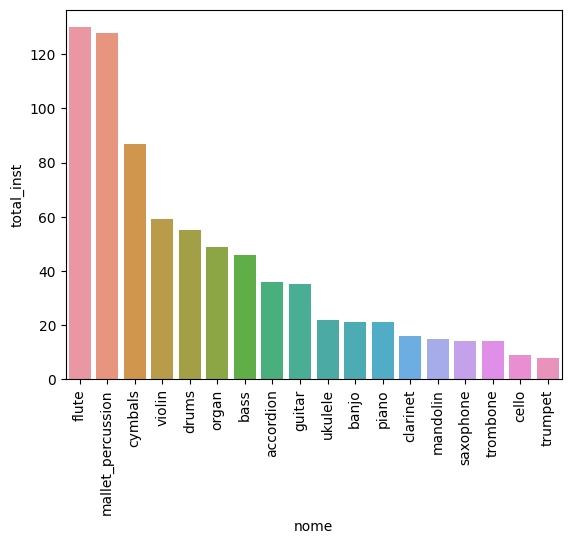

In [ ]:
plot_outilers_inst(outilers_base_geral)

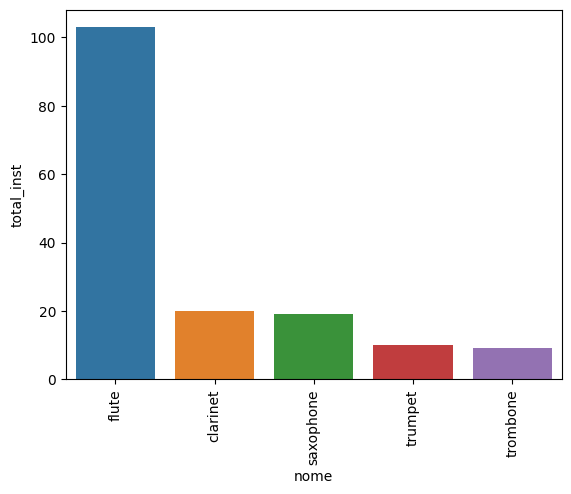

In [ ]:
plot_outilers_inst(outilers_sopro)

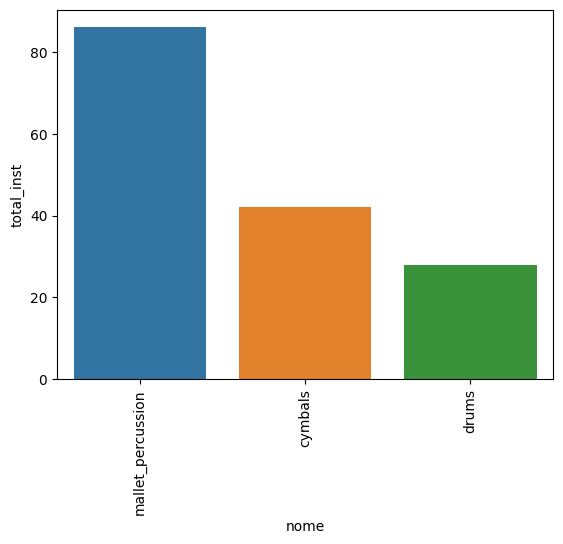

In [ ]:
plot_outilers_inst(outilers_percusao)

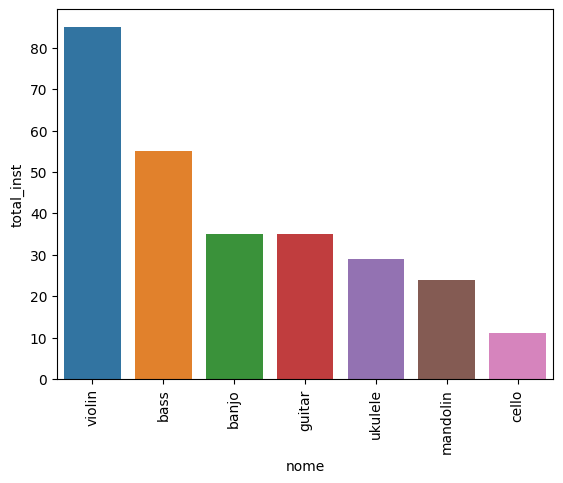

In [ ]:
plot_outilers_inst(outilers_corda)

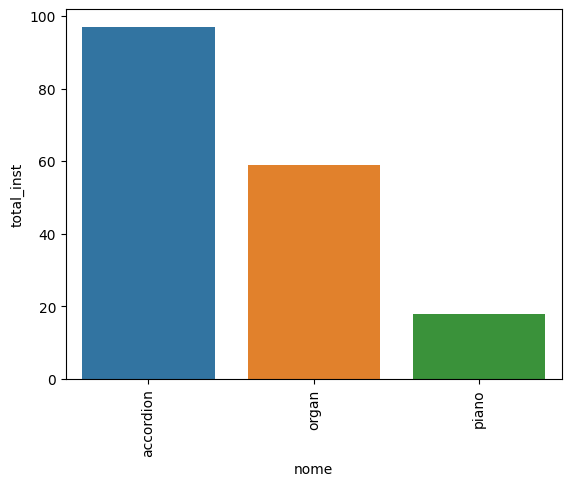

In [ ]:
plot_outilers_inst(outilers_aerofone)

# TESTES 

In [1]:
from pyod.models.knn import KNN
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

k 
algoritmo  
peso 

In [15]:
X = df_inst_aerofone.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

outliers_fraction = 0.2
# xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = KNN(contamination=outliers_fraction)
clf.fit(X)
aux = clf.labels_

In [16]:
outilers_id =[aux[i] == 1 for i in range(aux.shape[0])]   
outilers = X.iloc[outilers_id,:]
print(outilers.shape)

inlers_id =[aux[i] == 0 for i in range(aux.shape[0])]   
inlers = X.iloc[inlers_id,:]
print(inlers.shape)

(350, 45)
(1400, 45)


In [179]:
# labels_ int, 0 ou 1
# Os rótulos binários dos dados de treinamento.
# 0 significa inliers e 1 para outliers/anomalias. 
# É gerado pela aplicação threshold_em decision_scores_.

In [180]:
'''
As pontuações discrepantes dos dados de treinamento. Quanto mais alto, mais anormal. 
Outliers tendem a ter pontuações mais altas.
'''

scores_pred = clf.decision_function(X) * -1
# scores_pred = clf.decision_function(X) 
        
# previsão de um outlier ou inlier de categoria de ponto de dados
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

In [181]:
len(scores_pred)

1750

In [182]:
scores_pred.tolist()

[-630.4218172530499,
 -464.3955860808252,
 -435.06439966755505,
 -1338.543487013775,
 -392.7282951547525,
 -383.4656235588369,
 -699.9609545330519,
 -424.64470222963865,
 -523.5630586840552,
 -691.6144295428838,
 -451.9239639424241,
 -752.3610106315252,
 -557.221940006139,
 -618.5150027267925,
 -351.12660612084153,
 -303.6435182863416,
 -488.28514357746064,
 -421.43609591351014,
 -311.7843391111295,
 -356.4228131287805,
 -450.4863912471397,
 -461.0239167523445,
 -393.68165278779855,
 -511.62235605769814,
 -714.5619256727309,
 -633.6068955756624,
 -308.62020515597266,
 -355.3534822838215,
 -3628.3416044291885,
 -531.279661565797,
 -522.5376971769933,
 -489.1971749856948,
 -479.6670961771874,
 -511.7744578771893,
 -473.36753043724894,
 -838.6700186008243,
 -606.1702945942319,
 -543.8671768687358,
 -420.81639942239576,
 -340.7639870391988,
 -580.5806126090584,
 -594.9227536665087,
 -720.9030486747544,
 -339.10153666382354,
 -535.744626150103,
 -559.8547804237128,
 -1422.0810553390645,
 -4

In [183]:
# copia do dataframe
df1 = df_inst_aerofone
df1['outlier'] = y_pred.tolist()
    
# instrumento - inlier feature 1,  profit - inlier feature 2 (pega outliers)
inliers_instrumento = np.array(df1['instrumento'][df1['outlier'] == 0]).reshape(-1,1)

# instrumento - outlier feature 1, profit - outlier feature 2 (pega inliers)
outliers_instrumento = df1['instrumento'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ', n_outliers,'INLIERS: ',n_inliers)

'''
valor limite para considerar um ponto de dados inlier ou outlier
limite é baseado em contamination. São as amostras mais anormais em.
O limite é calculado para gerar rótulos discrepantes binários.n_samples * contaminationdecision_scores_
'''        
threshold = percentile(scores_pred, 100 * outliers_fraction)
print(threshold)

OUTLIERS:  145 INLIERS:  1605
-833.4770391248442
